In [1]:
from scripts.classes import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

b_neurons = [
    'AVAR',
    'AVAL',
    'SMDVR',
    'SMDVL',
    'SMDDR',
    'SMDDL',
    'RIBR',
    'RIBL'
]


In [2]:
all_models = []
xredall = []

for i in range(5):
    data = Database(i, verbose=0)
    data.exclude_neurons(b_neurons)

    # select data set
    x = np.asarray(data.neuron_traces.T)
    y = data.B

    base_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
    model = base_model.fit(x, y)
    y_pred = model.predict(x)


    accuracy = accuracy_score(y, y_pred)
    all_models.append(model)
    xredall.append(x)
    print("Accuracy:", accuracy)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'D:/Github/NeuronVisualizer2.0/data/NoStim_Data.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
# Get probabilities for cog-states
ypall = []
Wall = []

for idx in range(5):
    # get model and neuron traces
    model = all_models[idx]
    xred = xredall[idx]
    # get probabilities and weights
    yp = model.predict_proba(xred)
    W = model.coef_.T
    print(yp.shape, W.shape)

    ypall.append(yp)
    Wall.append(W)
  

(3137, 8) (103, 8)
(3134, 8) (127, 8)
(3059, 8) (123, 8)
(3311, 8) (119, 8)
(3021, 8) (121, 8)


In [6]:
nsets = 5
nrep = 10
max_clusters = 20
p_markov = np.zeros((max_clusters, nrep, 5))
xcall = []

print(p_markov.shape)

for nset in range(nsets):
    print('ypall shape:', ypall[nset].shape)
    M = ypall[nset].shape[0]
    xc = np.zeros((M, max_clusters, nrep))
    
    for reps in range(nrep):
        print("Set ", nset, " repetition ", reps)
        
        for nrclusters in range(max_clusters):
            # k-means
            clusters = KMeans(n_clusters=nrclusters+1, random_state=0, n_init="auto").fit(ypall[nset])
            xctmp = clusters.labels_
            print(len(xctmp), xctmp)
            
            p, _ = markovian(xctmp, K=200)
            p_markov[nrclusters, reps, nset] = p
            xc[:, nrclusters, reps] = xctmp
        
    xcall.append(xc)
            


(20, 10, 5)
ypall shape: (3137, 8)
Set  0  repetition  0
3137 [0 0 0 ... 0 0 0]
3137 [1 1 1 ... 1 1 1]
3137 [1 1 2 ... 2 2 2]
3137 [1 1 2 ... 2 2 2]
3137 [1 1 2 ... 2 2 2]
3137 [2 2 2 ... 5 5 5]
3137 [2 2 2 ... 5 5 5]
3137 [6 6 6 ... 7 7 7]
3137 [6 6 7 ... 7 7 7]
3137 [6 6 7 ... 7 7 7]
3137 [6 6 7 ... 7 7 7]
3137 [6 6 6 ... 7 7 7]
3137 [ 6  6 12 ...  7  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [ 6  6 19 ... 12 12 12]
Set  0  repetition  1
3137 [0 0 0 ... 0 0 0]
3137 [1 1 1 ... 1 1 1]
3137 [1 1 2 ... 2 2 2]
3137 [1 1 2 ... 2 2 2]
3137 [1 1 2 ... 2 2 2]
3137 [2 2 2 ... 5 5 5]
3137 [2 2 2 ... 5 5 5]
3137 [6 6 6 ... 7 7 7]
3137 [6 6 7 ... 7 7 7]
3137 [6 6 7 ... 7 7 7]
3137 [6 6 7 ... 7 7 7]
3137 [6 6 6 ... 7 7 7]
3137 [ 6  6 12 ...  7  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [13 13  6 ... 12  7 12]
3137 [13 13  6 ... 12

(20, 10, 5)
(10, 20)
(10, 20)
(10, 20)
(10, 20)
(10, 20)


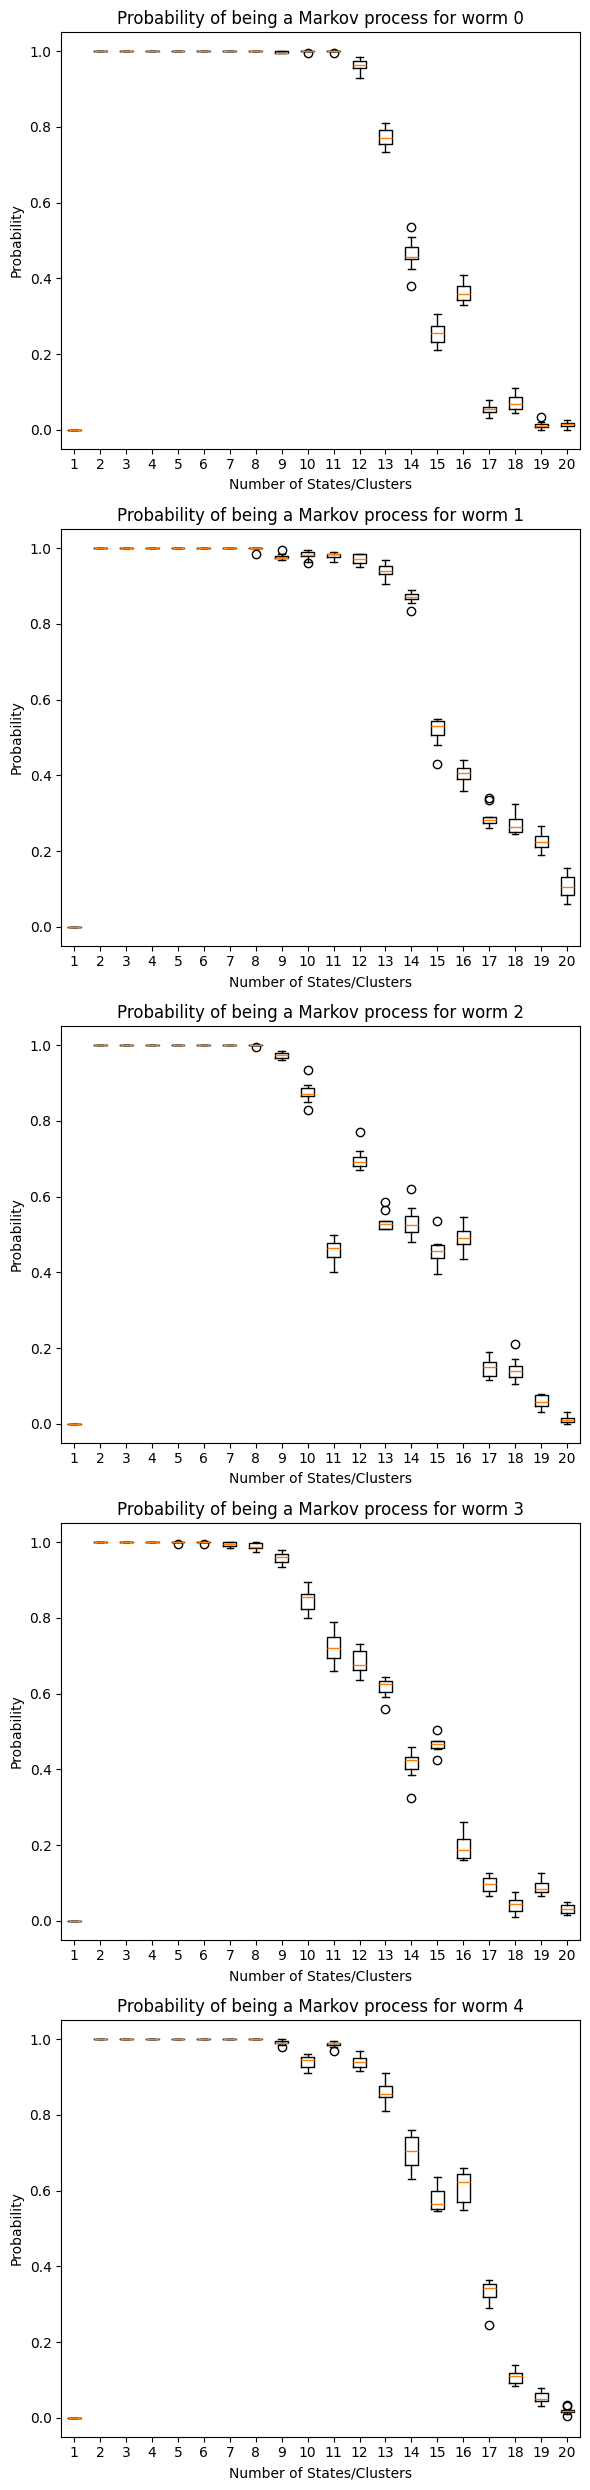

In [7]:
print(p_markov.shape)
worms = 5
fig, axes = plt.subplots(nrows=worms, ncols=1, figsize=(6, 25))

for idx, ax in enumerate(axes):

    data = p_markov[:,:,idx].T
    print(data.shape)
    # Create boxplots
    ax.boxplot(data)
    ax.set_title(f'Probability of being a Markov process for worm {idx}')
    ax.set_xlabel('Number of States/Clusters')
    ax.set_ylabel('Probability')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [9]:
print(p_markov.shape)
plot_markov = np.mean(p_markov, axis=1)
print(plot_markov.shape)


(20, 10, 5)
(20, 5)


(20, 10, 5)


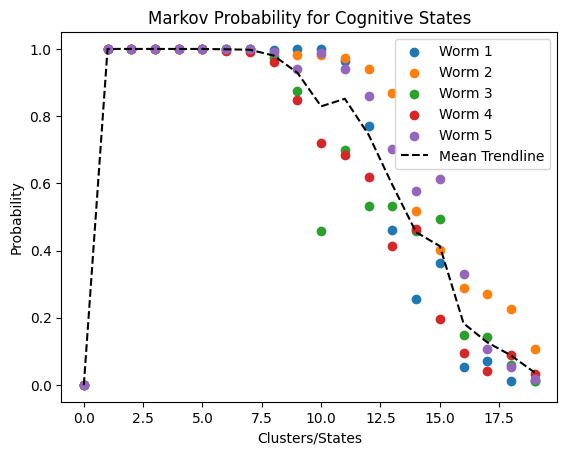

In [16]:
print(p_markov.shape)
plot_markov = np.mean(p_markov, axis=1).T
worms = 5


# Scatter plot each row with the index as x-values and the values as y-values
for i in range(plot_markov.shape[0]):
    plt.scatter(np.arange(plot_markov.shape[1]), plot_markov[i], label=f'Worm {i + 1}')

mean_trendline = np.mean(plot_markov, axis=0)
plt.plot(np.arange(plot_markov.shape[1]), mean_trendline, color='black', linestyle='--', label='Mean Trendline')

# Add labels and legend
plt.xlabel('Clusters/States')
plt.ylabel('Probability')
plt.title('Markov Probability for Cognitive States')
plt.legend()

# Show the plot
plt.show()

In [4]:
z, _ = simulate_markovian(M=100, N=5)
print(z)
p, P = markovian(z, K=200)
print(p)
print(P)

[2 2 2 4 0 3 1 3 0 0 0 1 3 3 3 1 0 0 1 1 1 1 1 2 0 1 3 1 3 1 1 1 0 1 1 1 0
 0 0 4 2 4 1 3 1 3 4 1 3 4 1 1 0 0 1 4 1 0 1 1 0 1 1 3 1 1 1 3 1 1 1 1 1 4
 2 4 3 3 1 1 1 4 0 1 4 1 1 3 3 1 1 4 3 3 3 1 3 1 3 1]
0.905
[[0.375      0.5        0.         0.0625     0.0625    ]
 [0.13333333 0.46666667 0.02222222 0.26666667 0.11111111]
 [0.2        0.         0.2        0.         0.6       ]
 [0.04761905 0.57142857 0.         0.28571429 0.0952381 ]
 [0.18181818 0.45454545 0.18181818 0.18181818 0.        ]]


In [1]:
### SAVING DATA WITH PICKLE ###

In [1]:
import pickle
from scripts.classes import *
b_neurons = [
    'AVAR',
    'AVAL',
    'SMDVR',
    'SMDVL',
    'SMDDR',
    'SMDDL',
    'RIBR',
    'RIBL'
]


6 neurons have been removed.
Accuracy: 0.8979917118265859
Testing markovianity - repetition  1
Testing markovianity - repetition  2
8 neurons have been removed.
Accuracy: 0.9010848755583918
Testing markovianity - repetition  1
Testing markovianity - repetition  2
8 neurons have been removed.
Accuracy: 0.9297155933311539
Testing markovianity - repetition  1
Testing markovianity - repetition  2
6 neurons have been removed.
Accuracy: 0.9447296889157354
Testing markovianity - repetition  1
Testing markovianity - repetition  2
8 neurons have been removed.
Accuracy: 0.9116186693147964
Testing markovianity - repetition  1
Testing markovianity - repetition  2


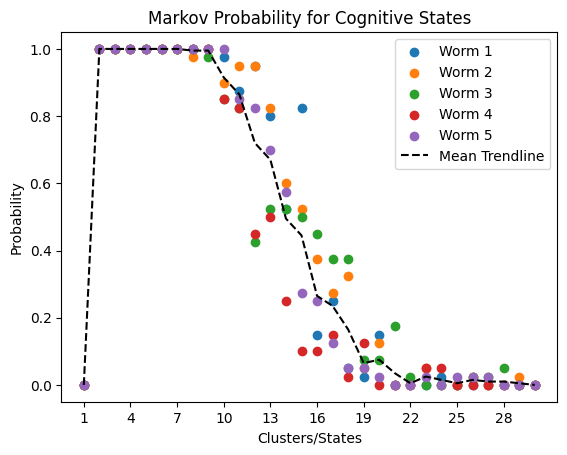

In [2]:
n_reps = 2
n_clusters = 30
n_worms = 5
p_m = np.zeros((n_clusters, n_reps, n_worms))

for i in range(n_worms):
    data = Database(data_set_no=i)
    data.exclude_neurons(b_neurons)

    logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

    data.fit_model(logreg, markov_test=True, nrep=n_reps, max_clusters=n_clusters, sim_markov=20)
    p_m[:, :, i] = data.p_markov
    
    #with open(f'data/pickles/data_worm_{i+1}_test.pkl', 'wb') as file:
    #    pickle.dump(data, file)

plot_markov = np.mean(p_m, axis=1).T

average_markov_plot(plot_markov)


In [5]:
import pickle
from scripts.classes import *
# Load the pickled data back into a Python object
data = []
for i in range(5):
    with open(f'data/pickles/data_worm_{i+1}.pkl', 'rb') as file:
        loaded_data = pickle.load(file)
        data.append(loaded_data.p_markov)
    #loaded_data.plot_markov()
    
data = np.asarray(data)
print(data.shape)
data = data.mean(axis=2)
print(data.shape)

(5, 20, 100)
(5, 20)


/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
#%matplotlib inline
%matplotlib notebook
average_markov_plot(data)

<IPython.core.display.Javascript object>